# CAPSTONE (9 OCT 2021) - HR ANALYTICS-DATA SCIENTISTS QUITTING BY ALICE CHANG for IOD DATA SCIENCE & AI

In [1]:
# Import libraries

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
import time

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn import svm
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import KFold

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

from sklearn import tree
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier 
from dtreeviz.trees import dtreeviz 

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.neural_network import MLPClassifier

## Avoid some version change warnings
import warnings
warnings.filterwarnings('ignore')

### IMPORT DATASETS AND DO ANALYSIS (EDA)

In [2]:
hr_dataset1 = pd.read_csv('hr_train.csv')
hr_dataset2 = pd.read_csv('hr_test.csv')

In [3]:
# Concate datasets into one

hr_dataset = pd.concat([hr_dataset1, hr_dataset2])
hr_dataset.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
# Dataset has 21,287 rows and 14 columns

hr_dataset.shape

(21287, 14)

In [5]:
hr_dataset.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [6]:
hr_dataset.rename(columns={'relevent_experience': 'relevant_exp', 'experience': 'work_exp', \
                           'last_new_job': 'length_last_job'}, inplace=True)

### Columns and descriptions
#### enrollee_id :  Unique ID (not useful) 
#### city:  City code (not useful)
#### city_ development _index :  Development index of the city (scaled) 
#### gender: Gender of candidate 
#### relevant_exp: Relevant experience of candidate (useful)
#### enrolled_university: Enrolled in a related course (useful)
#### education_level: Highest education level attained (useful)
#### major_discipline :Education major (useful)
#### work_exp: Total work experience in years (useful)
#### company_size: No of employees in current company (useful)
#### company_type : Type of current company 
#### length_last_job: Length employed in last job (useful)
#### training_hours: training hours completed (useful)
#### target: 0 – Not looking to switch company/job, 1 – Looking to switch job/company

In [7]:
# Raw dataset before cleaning

hr_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21287 entries, 0 to 2128
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             21287 non-null  int64  
 1   city                    21287 non-null  object 
 2   city_development_index  21287 non-null  float64
 3   gender                  16271 non-null  object 
 4   relevant_exp            21287 non-null  object 
 5   enrolled_university     20870 non-null  object 
 6   education_level         20775 non-null  object 
 7   major_discipline        18162 non-null  object 
 8   work_exp                21217 non-null  object 
 9   company_size            14727 non-null  object 
 10  company_type            14513 non-null  object 
 11  length_last_job         20824 non-null  object 
 12  training_hours          21287 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
mem

In [8]:
# Check total null in 'target' column

hr_dataset['target'].isnull().sum()

2129

In [9]:
# Drop or delete the 2129 rows from 'target' column

hr_dataset = hr_dataset.dropna(axis=0, subset=['target'])

In [10]:
hr_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevant_exp            19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   work_exp                19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  length_last_job         18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [11]:
# fill forward null values

hr_dataset.ffill(axis=None, inplace=True)

In [12]:
hr_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  object 
 4   relevant_exp            19158 non-null  object 
 5   enrolled_university     19158 non-null  object 
 6   education_level         19158 non-null  object 
 7   major_discipline        19158 non-null  object 
 8   work_exp                19158 non-null  object 
 9   company_size            19157 non-null  object 
 10  company_type            19157 non-null  object 
 11  length_last_job         19158 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [13]:
# Fill backwards null values

hr_dataset.bfill(axis=None, inplace=True)

In [14]:
# Check - Done

hr_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  object 
 4   relevant_exp            19158 non-null  object 
 5   enrolled_university     19158 non-null  object 
 6   education_level         19158 non-null  object 
 7   major_discipline        19158 non-null  object 
 8   work_exp                19158 non-null  object 
 9   company_size            19158 non-null  object 
 10  company_type            19158 non-null  object 
 11  length_last_job         19158 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [15]:
# Cleaned-up hr_dataset has 19158 rows

hr_dataset.shape

(19158, 14)

In [16]:
hr_dataset_2 = hr_dataset.copy()

In [17]:
hr_dataset.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevant_exp              0
enrolled_university       0
education_level           0
major_discipline          0
work_exp                  0
company_size              0
company_type              0
length_last_job           0
training_hours            0
target                    0
dtype: int64

In [18]:
#hr_dataset[hr_dataset.duplicated() == True]

In [19]:
hr_dataset['enrolled_university'].value_counts()

no_enrollment       14088
Full time course     3840
Part time course     1230
Name: enrolled_university, dtype: int64

In [20]:
hr_dataset['relevant_exp'].value_counts()

Has relevent experience    13792
No relevent experience      5366
Name: relevant_exp, dtype: int64

In [21]:
hr_dataset['training_hours'].describe()

count    19158.000000
mean        65.366896
std         60.058462
min          1.000000
25%         23.000000
50%         47.000000
75%         88.000000
max        336.000000
Name: training_hours, dtype: float64

In [22]:
hr_dataset['gender'].value_counts()

Male      17260
Female     1647
Other       251
Name: gender, dtype: int64

In [23]:
hr_dataset['education_level'].value_counts()

Graduate          11890
Masters            4469
High School        2063
Phd                 420
Primary School      316
Name: education_level, dtype: int64

In [24]:
# Mapping categorical values into numeric values in 9 columns

gender_map = {
    'Female' : 2,
    'Male' : 1,
    'Other' : 0
    }

relevance_map = {
    'Has relevent experience' : 1,
    'No relevent experience' : 0
    }

enrolled_map = {
    'no_enrollment' : 0,
    'Part time course' : 1,
    'Full time course' : 2
    }

education_map = {
    'Primary School' :    0,
    'High School'    :    1,
    'Graduate'       :    2,
    'Masters'        :    3, 
    'Phd'            :    4
    } 

major_discipline_map = {
    'STEM' : 5,
    'Business Degree' : 4,
    'Humanities' : 3,
    'Arts' : 2,
    'Other' : 1,
    'No Major' : 0
    }

experience_map = {
    '<1' : 0,
    '1' : 1,
    '2' : 2,
    '3' : 3,
    '4' : 4,
    '5' : 5,
    '6' : 6,
    '7' : 7,
    '8' : 8,
    '9' : 9,
    '10' : 10,
    '11' : 11,
    '12' : 12,
    '13' : 13,
    '14' : 14,
    '15' : 15,
    '16' : 16,
    '17' : 17,
    '18' : 18,
    '19' : 19,
    '20' : 20,
    '>20' : 21
    }

company_size_map = {
    '<10' : 0,
    '10/49' : 1,
    '50-99' : 2,
    '100-500' :3,
    '500-999' :4,
    '1000-4999': 5,
    '5000-9999' : 6,
    '10000+' : 7
    }

company_type_map = {
    'Pvt Ltd'               :    5,
    'Funded Startup'        :    4, 
    'Early Stage Startup'   :    3, 
    'Other'                 :    2, 
    'Public Sector'         :    1, 
    'NGO'                   :    0
}

last_job_map = {
    'never'        :    0,
    '1'            :    1, 
    '2'            :    2, 
    '3'            :    3, 
    '4'            :    4, 
    '>4'           :    5
}

hr_dataset['gender'] = hr_dataset['gender'].map({'Male':1, 'Female':2, 'Other':0})
hr_dataset['relevant_exp'] = hr_dataset['relevant_exp'].map(relevance_map)
hr_dataset['enrolled_university'] = hr_dataset['enrolled_university'].map(enrolled_map)
hr_dataset['education_level'] = hr_dataset['education_level'].map(education_map)
hr_dataset['major_discipline'] = hr_dataset['major_discipline'].map(major_discipline_map)
hr_dataset['work_exp'] = hr_dataset['work_exp'].map(experience_map)
hr_dataset['company_size'] = hr_dataset['company_size'].map(company_size_map)
hr_dataset['company_type'] = hr_dataset['company_type'].map(company_type_map)
hr_dataset['length_last_job'] = hr_dataset['length_last_job'].map(last_job_map)


In [25]:
# Using qcut method to relabel values for training hours

hr_dataset['training_hrs_cat'] = pd.qcut(hr_dataset['training_hours'], q=10, labels=np.arange(1,11))

In [26]:
hr_dataset.head(20)

,enrollee_id,city,city_development_index,gender,relevant_exp,enrolled_university,education_level,major_discipline,work_exp,company_size,company_type,length_last_job,training_hours,target,training_hrs_cat
0,8949,city_103,0.920,1,1,0,2,5,21,2,5,1,36,1.0,4
1,29725,city_40,0.776,1,0,0,2,5,15,2,5,5,47,0.0,5
2,11561,city_21,0.624,1,0,2,2,5,5,2,5,0,83,0.0,8
3,33241,city_115,0.789,1,0,2,2,4,0,2,5,0,52,1.0,6
4,666,city_162,0.767,1,1,0,3,5,21,2,4,4,8,0.0,1
5,21651,city_176,0.764,1,1,1,2,5,11,2,4,1,24,1.0,3
6,28806,city_160,0.920,1,1,0,1,5,5,2,4,1,24,0.0,3
7,402,city_46,0.762,1,1,0,2,5,13,0,5,5,18,1.0,2
8,27107,city_103,0.920,1,1,0,2,5,7,2,5,1,46,1.0,5
9,699,city_103,0.920,1,1,0,2,5,17,7,5,5,123,0.0,9


In [27]:
#hr_dataset['training_hrs_cat'].value_counts()

In [28]:
# Define X and y

X = hr_dataset.drop(['enrollee_id','city','training_hrs_cat','target'], axis=1)
y = hr_dataset['target']

In [29]:
# Identify the target

hr_dataset.groupby('target').size()

target
0.0    14381
1.0     4777
dtype: int64

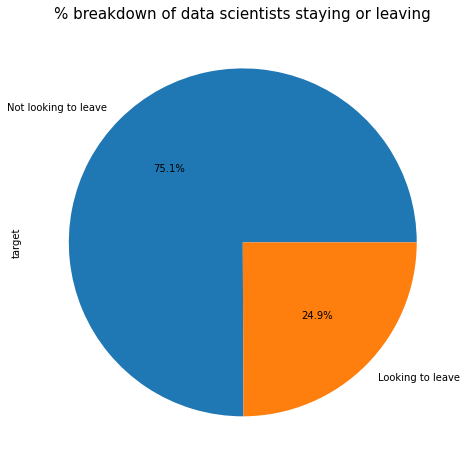

In [30]:
# plot a diagram to show the large imbalance between those who want to quit vs those are not quitting

fig=plt.gcf()
fig.set_size_inches(8,8)
label=['Not looking to leave', 'Looking to leave']
hr_dataset['target'].value_counts().plot.pie(labels=label, autopct="%1.1f%%");
plt.title('% breakdown of data scientists staying or leaving', fontsize=15);

In [31]:
hr_dataset.groupby('gender').size()

gender
0      251
1    17260
2     1647
dtype: int64

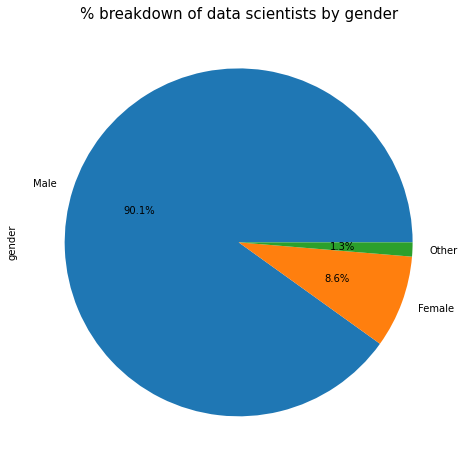

In [32]:
# Visualise with pie chart the large imbalance for gender

fig=plt.gcf()
fig.set_size_inches(8,8)
label=['Male', 'Female', 'Other']
hr_dataset['gender'].value_counts().plot.pie(labels=label, autopct="%1.1f%%");
plt.title('% breakdown of data scientists by gender', fontsize=15);

In [33]:
# Breakdown of those who have experience in data science vs those who don't

hr_dataset.groupby('relevant_exp').size()

relevant_exp
0     5366
1    13792
dtype: int64

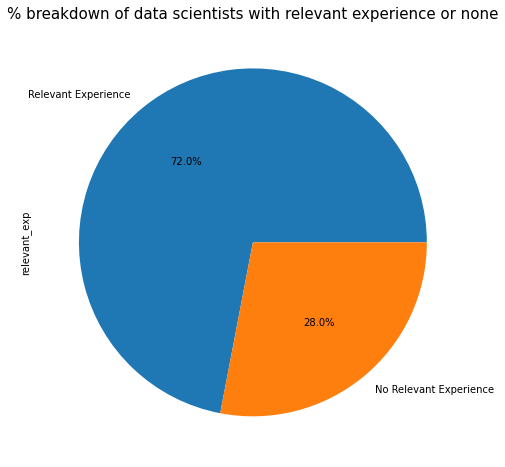

In [34]:
# Visualise with a pie chart the large imbalance

fig=plt.gcf()
fig.set_size_inches(8,8)
label=['Relevant Experience', 'No Relevant Experience']
hr_dataset['relevant_exp'].value_counts().plot.pie(labels=label, autopct="%1.1f%%");
plt.title('% breakdown of data scientists with relevant experience or none', fontsize=15);

In [35]:
# Breakdown of those who enrolled for Data Science course and those who haven't

hr_dataset.groupby('enrolled_university').size()

enrolled_university
0    14088
1     1230
2     3840
dtype: int64

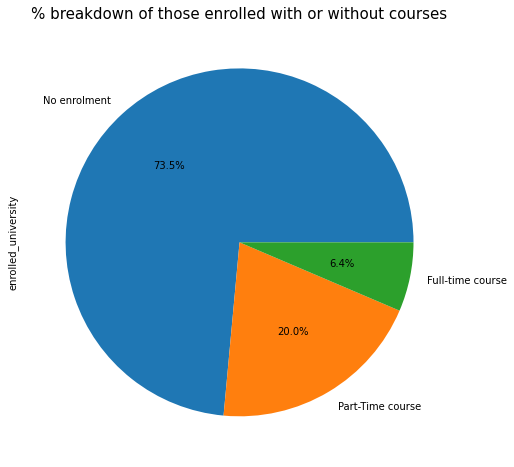

In [36]:
fig=plt.gcf()
fig.set_size_inches(8,8)
label=['No enrolment','Part-Time course','Full-time course']
hr_dataset['enrolled_university'].value_counts().plot.pie(labels=label, autopct="%1.1f%%");
plt.title('% breakdown of those enrolled with or without courses', fontsize=15);

In [37]:
hr_dataset.groupby('education_level').size()

education_level
0      316
1     2063
2    11890
3     4469
4      420
dtype: int64

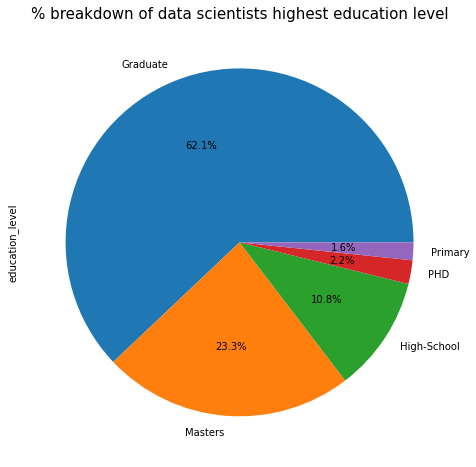

In [38]:
fig=plt.gcf()
fig.set_size_inches(8,8)
label=['Graduate', 'Masters','High-School', 'PHD', 'Primary']
hr_dataset['education_level'].value_counts().plot.pie(labels=label, autopct="%1.1f%%");
plt.title('% breakdown of data scientists highest education level', fontsize=15);

In [39]:
hr_dataset_2.head()

,enrollee_id,city,city_development_index,gender,relevant_exp,enrolled_university,education_level,major_discipline,work_exp,company_size,company_type,length_last_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0.0
3,33241,city_115,0.789,Male,No relevent experience,Full time course,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


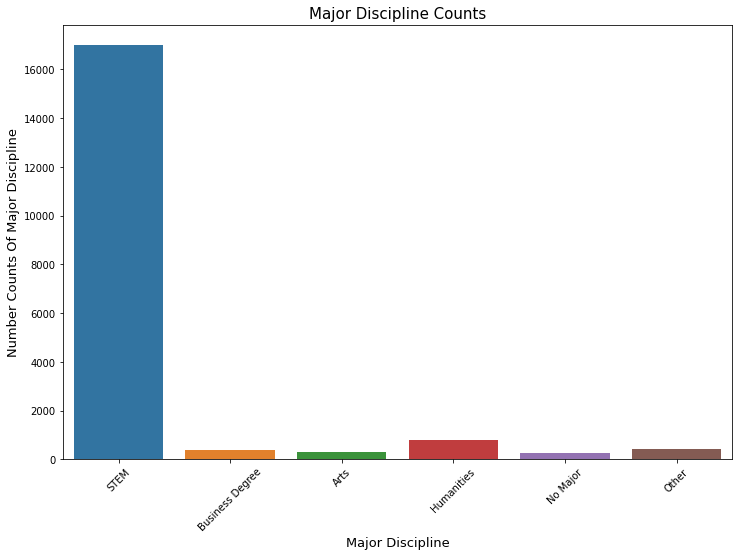

In [40]:
# Plot a graph to show the different education major of data scientists

plt.figure(figsize=(12,8))
sns.countplot(data=hr_dataset_2, x='major_discipline')
plt.xticks(rotation=45);
plt.xlabel('Major Discipline', fontsize=13);
plt.ylabel('Number Counts Of Major Discipline',fontsize=13);
plt.title('Major Discipline Counts', fontsize=15);

In [41]:
years_exp = hr_dataset.groupby('work_exp').size().sort_values(ascending=False).index

In [42]:
hr_dataset.groupby('work_exp').size().sort_values(ascending=False).index

Int64Index([21, 5, 4, 3, 6, 2, 7, 10, 9, 8, 15, 11, 14, 1, 0, 16, 12, 13, 17,
            19, 18, 20],
           dtype='int64', name='work_exp')

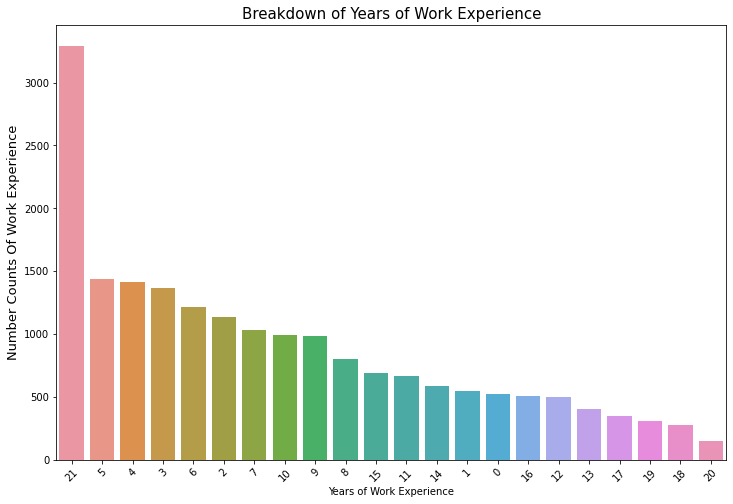

In [43]:
# Plot a graph to visualise their years of work experience, where a large majority had over 20 years.

plt.figure(figsize=(12,8))
#hr_dataset_3 = hr_dataset_2['work_exp'].sort_values(ascending=False)
sns.countplot(data=hr_dataset, x='work_exp', order=years_exp);
plt.xticks(rotation=45);
plt.xlabel('Years of Work Experience', fontsize=10);
plt.ylabel('Number Counts Of Work Experience',fontsize=13);
plt.title('Breakdown of Years of Work Experience', fontsize=15);

In [44]:
hr_dataset['length_last_job'].value_counts()

1    8217
5    3362
2    2975
0    2508
4    1055
3    1041
Name: length_last_job, dtype: int64

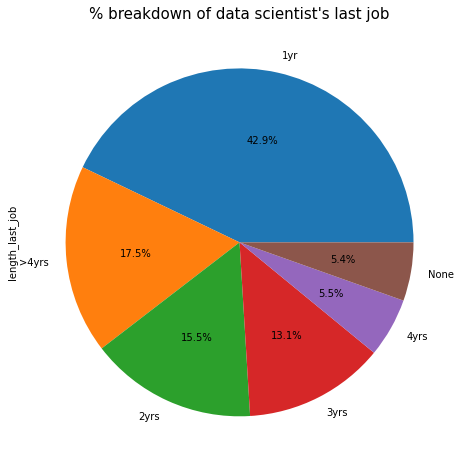

In [45]:
fig=plt.gcf()
fig.set_size_inches(8,8)
label=['1yr', '>4yrs', '2yrs', '3yrs', '4yrs', 'None']
hr_dataset['length_last_job'].value_counts().plot.pie(labels=label, autopct="%1.1f%%");
plt.title("% breakdown of data scientist's last job", fontsize=15);

In [46]:
hours = hr_dataset.groupby('training_hrs_cat').size().sort_values(ascending=False).index

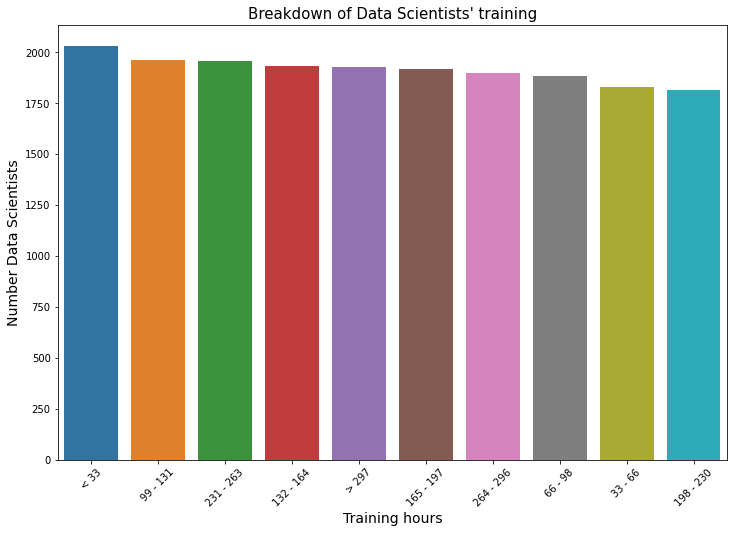

In [47]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data=hr_dataset, x='training_hrs_cat', order=hours);
plt.xticks(rotation=45);
plt.xlabel('Training hours', fontsize=14);
plt.ylabel("Number Data Scientists",fontsize=14);
plt.title("Breakdown of Data Scientists' training", fontsize=15);

labels = [item.get_text() for item in ax.get_xticklabels()]

label = ['< 33', '99 - 131', '231 - 263', '132 - 164', '> 297', '165 - 197', '264 - 296', \
          '66 - 98', '33 - 66', '198 - 230']

bins = np.arange(0,10)

for b, l in zip(bins, label):
     labels[b] = l

ax.set_xticklabels(labels)

plt.show()

### SCALE AND SPLIT THE DATASET FOR TRAINING AND TESTING

In [48]:
# sc = StandardScaler()
# X_sc = sc.fit_transform(X)

In [49]:
# Split dataset into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
 
# describes the rows and columns of train and test sets
print("Number of X_train dataset: ", X_train.shape)
print("Number of y_train dataset: ", y_train.shape)
print("Number of X_test dataset: ", X_test.shape)
print("Number of y_test dataset: ", y_test.shape)

Number of X_train dataset:  (13410, 11)
Number of y_train dataset:  (13410,)
Number of X_test dataset:  (5748, 11)
Number of y_test dataset:  (5748,)


In [50]:
# Scale, fit and standardise X 

scaler = StandardScaler().fit(X)
X_sc = scaler.transform(X)

In [51]:
X_sc.shape

(19158, 11)

In [52]:
# from mlxtend.plotting import plot_confusion_matrix

# def evaluate_model(X_train, y_train, model):
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     scores = cross_val_score(model, X_train, y_train, cv=3, scoring="accuracy")
#     diff = scores.mean() - model.score(X_test, y_test)
#     SD = diff / scores.std()
    
#     print(f"Training Score:{model.score(X_train, y_train)}")
#     print(f"Cross V Score: {scores.mean()} +/- {scores.std()}")
#     print(f"Testing Score: {model.score(X_test, y_test)}")
#     print(f"Cross & Test Diff: {diff}")
#     print(f"Standard Deviations Away: {SD}")
#     #print(f"Confusion Matrix: {confusion_matrix(y_test, preds)}")
#     print(f"Report: {classification_report(y_test, preds)}")
#     print(f"Accuracy Score: {accuracy_score(y_test, preds)}")
    
#     #Cofusion Matrix
#     cf_matrix = confusion_matrix(y_test, preds)
#     group_names = ['True Neg','False Pos','False Neg','True Pos']
#     group_counts = ["{0:0.0f}".format(value) for value in
#                 cf_matrix.flatten()]
#     group_percentages = ["{0:.2%}".format(value) for value in
#                      cf_matrix.flatten()/np.sum(cf_matrix)]
#     labels = [f"{v1}\n{v2}\n{v3}"for v1, v2, v3 in
#           zip(group_names,group_counts,group_percentages)]
#     labels = np.asarray(labels).reshape(2,2)
#     sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
    
    
#     #Plot ROC Curve
#     y_pred_prob = model.predict_proba(X_test)[:,1]
#     fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob

#     fig = px.area(x=fpr, y=tpr,
#     title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
#     labels=dict(x='False Positive Rate(1-Specificity)', y='True Positive Rate(Sensitivity)'),
#     width=700, height=500
    
#        )
#     fig.add_shape(
#     type='line', line=dict(dash='dash'),
#     x0=0, x1=1, y0=0, y1=1
#      )

#     fig.update_yaxes(scaleanchor="x", scaleratio=1)
#     fig.update_xaxes(constrain='domain')
#     fig.show()

In [53]:
# from mlxtend.plotting import plot_confusion_matrix

# def evaluate_model(X,y, model):
#     model.fit(X,y)
#     scores = cross_val_score(model, X, y, cv=3, scoring="accuracy")
#     diff = scores.mean() - model.score(X_test, y_test)
#     SD = diff / scores.std()
    
#     print(f"Training Score:{model.score(X_train, y_train)}")
#     print(f"Cross V Score: {scores.mean()} +/- {scores.std()}")
#     print(f"Testing Score: {model.score(X_test, y_test)}")
#     print(f"Cross & Test Diff: {diff}")
#     print(f"Standard Deviations Away: {SD}")
#     #print(f"Confusion Matrix: {confusion_matrix(y_test, preds)}")
#     print(f"Report: {classification_report(y_test, preds)}")
#     print(f"Accuracy Score: {accuracy_score(y_test, preds)}")
    
#     #Cofusion Matrix
#     cf_matrix = confusion_matrix(y_test, preds)
#     group_names = ['True Neg','False Pos','False Neg','True Pos']
#     group_counts = ["{0:0.0f}".format(value) for value in
#                 cf_matrix.flatten()]
#     group_percentages = ["{0:.2%}".format(value) for value in
#                      cf_matrix.flatten()/np.sum(cf_matrix)]
#     labels = [f"{v1}\n{v2}\n{v3}"for v1, v2, v3 in
#           zip(group_names,group_counts,group_percentages)]
#     labels = np.asarray(labels).reshape(2,2)
#     sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
    
    
#     #Plot ROC Curve
#     y_pred_prob = model.predict_proba(X_test)[:,1]
#     fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

#     fig = px.area(x=fpr, y=tpr,
#     title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
#     labels=dict(x='False Positive Rate(1-Specificity)', y='True Positive Rate(Sensitivity)'),
#     width=700, height=500
    
#        )
#     fig.add_shape(
#     type='line', line=dict(dash='dash'),
#     x0=0, x1=1, y0=0, y1=1
#      )

#     fig.update_yaxes(scaleanchor="x", scaleratio=1)
#     fig.update_xaxes(constrain='domain')
#     fig.show()

### Use Baseline Modeling after standardising dataset

In [54]:
# logistic regression object
lr = LogisticRegression()
 
# train the model on train set
lr.fit(X_train, y_train)
 
y_pred = lr.predict(X_test)
 
# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.96      0.85      4297
         1.0       0.54      0.14      0.23      1451

    accuracy                           0.75      5748
   macro avg       0.66      0.55      0.54      5748
weighted avg       0.71      0.75      0.70      5748



In [55]:
# def confusion_matrix(y_test, y_pred):
#     cm = confusion_matrix(y_test, y_pred)
#     tp = cm[1][1]
#     fp = cm[0][1]
#     fn = cm[1][0]
#     tn = cm[0][0]
    
#     cm = {'(Positive)': [tp, fp],
#           '(Negative)': [fn, tn],}

#     df = pd.DataFrame(cm, columns = ['Predicted (Positive)', 'Predicted (Negative)'], 
#                       index=['Actual (Positive)', 'Actual (Negative)'])
    
#     return df

In [56]:
# sns.set(font_scale=1.5)
# cm = confusion_matrix(y_test, y_pred)
# sns.heatmap(cm, annot=True, fmt='g')
# plt.show()

## Fix imbalanced dataset by using SMOTE

In [57]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {}".format(sum(y_train == 0)))
 
# import SMOTE module from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
 
print('After OverSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After OverSampling, the shape of train_y: {}'.format(y_train_smote.shape))
 
print("After OverSampling, counts of label '1': {}".format(sum(y_train_smote == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_smote == 0)))

Before OverSampling, counts of label '1': 3326
Before OverSampling, counts of label '0': 10084
After OverSampling, the shape of train_X: (20168, 11)
After OverSampling, the shape of train_y: (20168,)
After OverSampling, counts of label '1': 10084
After OverSampling, counts of label '0': 10084


In [58]:
# Train SMOTE dataset with logistic regression

lr1 = LogisticRegression()
lr1.fit(X_train_smote, y_train_smote)
y_pred = lr1.predict(X_test)
 
# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.70      0.75      4297
         1.0       0.38      0.53      0.44      1451

    accuracy                           0.66      5748
   macro avg       0.60      0.62      0.60      5748
weighted avg       0.70      0.66      0.68      5748



### TRY IMBALANCED DATASET WITH NEARMISS

In [59]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {}".format(sum(y_train == 0)))
 
# apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()
 
X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train)
 
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After Undersampling, the shape of train_y: {}'.format(y_train_miss.shape))
 
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

Before Undersampling, counts of label '1': 3326
Before Undersampling, counts of label '0': 10084
After Undersampling, the shape of train_X: (6652, 11)
After Undersampling, the shape of train_y: (6652,)
After Undersampling, counts of label '1': 3326
After Undersampling, counts of label '0': 3326


In [60]:
# Run the model on Nearmissed train set

lr2 = LogisticRegression()
lr2.fit(X_train_miss, y_train_miss)
y_pred = lr2.predict(X_test)
 
# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.51      0.62      4297
         1.0       0.30      0.64      0.41      1451

    accuracy                           0.54      5748
   macro avg       0.56      0.57      0.52      5748
weighted avg       0.68      0.54      0.57      5748



## Determine which factors contribute to data scientists leaving their jobs

In [61]:
# Determine the feature importance with model

clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)
ExtraTreesClassifier(random_state=0)
features = clf.feature_importances_

In [62]:
# Use function and loop to list the feature importance

addup = list()
for ft, x in zip(features, X.columns):
    mydict = { 'importance': ft,'features': x}
    addup.append(mydict)
    
# Display into a dataframe
feature_df = pd.DataFrame(data=addup, columns=['features','importance'])
feature_df

,features,importance
0,city_development_index,0.233576
1,gender,0.022423
2,relevant_exp,0.016316
3,enrolled_university,0.024422
4,education_level,0.048494
5,major_discipline,0.029475
6,work_exp,0.146971
7,company_size,0.112092
8,company_type,0.048399
9,length_last_job,0.068758


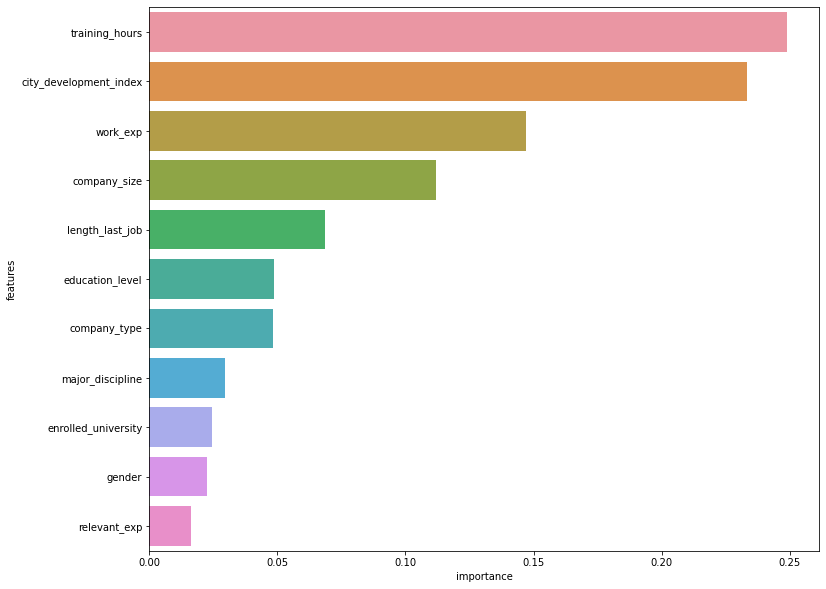

In [63]:
# Visualise with bar graph the ranking of importance for each feature

order = feature_df.sort_values('importance', ascending=False).features
plt.figure(figsize=(12,10))
sns.barplot(data=feature_df, x='importance', y='features', order=order);

In [64]:
y_test.shape,y_pred.shape

((5748,), (5748,))

In [65]:
# Running SMOTE without splitting the data into train and test sets as Gridsearch will split the dataset on it's own.

sm2 = SMOTE(random_state = 2)
X_res, y_res = sm2.fit_resample(X,y)

In [66]:
# def confusion_matrix(y_test, y_pred):
#     cm = confusion_matrix(y_test, y_pred)
#     print(cm)
#     group_names = ['True Neg','False Pos','False Neg','True Pos']
#     group_counts = ["{0:0.0f}".format(value) for value in
#                 cm.flatten()]
#     group_percentages = ["{0:.2%}".format(value) for value in
#                      cm.flatten()/np.sum(cm)]
#     labels = [f"{v1}\n{v2}\n{v3}"for v1, v2, v3 in
#           zip(group_names,group_counts,group_percentages)]
#     labels = np.asarray(labels).reshape(2,2)
#     sns.heatmap(cm, annot=True, fmt="", cmap='Red')

### Find the hyperparameters for Machine Learning models by using GridSearchCV 

In [67]:
# Gridsearch for RandomforestClassifier

%%time

params = {'n_estimators':[100, 150, 200],
'max_depth':[10, 15, 20]}
rfc = RandomForestClassifier()
grid = GridSearchCV(estimator = rfc, param_grid = params, cv=5)
grid.fit(X_res, y_res)
print("Grid Best Score: ", grid.best_score_)
print("Grid Best Parameters: ", grid.best_params_)

UsageError: Line magic function `%%time` not found.


              precision    recall  f1-score   support

         0.0       0.83      0.80      0.81      4297
         1.0       0.46      0.51      0.49      1451

    accuracy                           0.73      5748
   macro avg       0.65      0.66      0.65      5748
weighted avg       0.74      0.73      0.73      5748

Wall time: 11.4 s


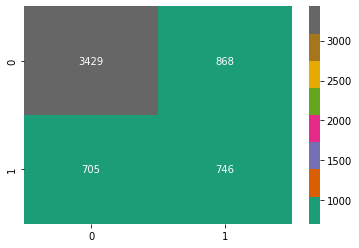

In [68]:
%%time

# train the hyper-tuned RandomForestClassifier on SMOTE train set
rfc = RandomForestClassifier(max_depth=20, n_estimators=200)
rfc.fit(X_train_smote, y_train_smote)
y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="", cmap='Dark2')
# print classification report
print(classification_report(y_test, y_pred))


In [69]:
# %%time

# parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
# svc = SVC()
# grid = GridSearchCV(estimator=svc, param_grid = parameters, cv=5)
# grid.fit(X_res, y_res)
# print("Grid Best Score: ", grid.best_score_)
# print("Grid Best Parameters: ", grid.best_params_)

In [70]:
# %%time

# # train the model on train set
# svc = SVC(kernel='linear', C=10)
# svc.fit(X_train_smote, y_train_smote)
# y_pred = svc.predict(X_test)
# cm = confusion_matrix(y_test, y_pred)
# sns.heatmap(cm, annot=True, fmt="", cmap='Oranges')

# # print classification report
# print(classification_report(y_test, y_pred))


In [71]:
# Gridsearch for KNeighborsClassifier

%%time

params = {'n_neighbors':[5,10,15],
'weights':['uniform','distance']}
knn = KNeighborsClassifier()
grid = GridSearchCV(estimator = knn, param_grid = params, cv=5)
grid.fit(X_res, y_res)
print("Grid Best Score: ", grid.best_score_)
print("Grid Best Parameters: ", grid.best_params_)

UsageError: Line magic function `%%time` not found.


              precision    recall  f1-score   support

         0.0       0.78      0.63      0.70      4297
         1.0       0.30      0.48      0.37      1451

    accuracy                           0.59      5748
   macro avg       0.54      0.56      0.53      5748
weighted avg       0.66      0.59      0.61      5748

Wall time: 666 ms


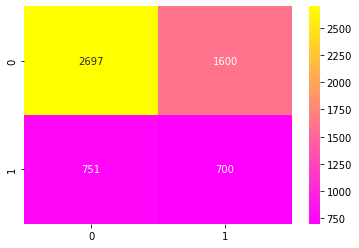

In [72]:
%%time

# train the hyper-tuned KNeighborsClassifier on SMOTE train set
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train_smote, y_train_smote)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="", cmap='spring')
# print classification report
print(classification_report(y_test, y_pred))

In [73]:
# Gridsearch for DecisionTreeClassifier

%%time

params = {'criterion':['gini', 'entropy'],
'splitter':['best','random'],
         'max_depth': [10, 15, 20]}
tree = DecisionTreeClassifier()
grid = GridSearchCV(estimator = tree, param_grid = params)
grid.fit(X_res, y_res)
print("Grid Best Score: ", grid.best_score_)
print("Grid Best Parameters: ", grid.best_params_)

UsageError: Line magic function `%%time` not found.


              precision    recall  f1-score   support

         0.0       0.78      0.63      0.70      4297
         1.0       0.30      0.48      0.37      1451

    accuracy                           0.59      5748
   macro avg       0.54      0.56      0.53      5748
weighted avg       0.66      0.59      0.61      5748

Wall time: 450 ms


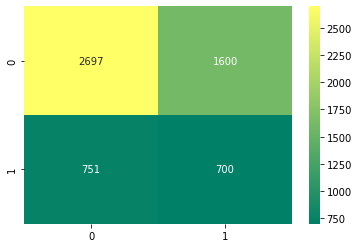

In [74]:
%%time

# train the hyper-tuned DecisionTreeClassifier on SMOTE train set
tree = DecisionTreeClassifier(criterion='entropy', max_depth=20, splitter='best')
tree.fit(X_train_smote, y_train_smote)
predictions = tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="", cmap='summer') 
# print classification report
print(classification_report(y_test, y_pred))

In [75]:
# Gridsearch for AdaBoostClassifier

%%time

params = {'n_estimators':[20, 40, 60, 80, 100],
'learning_rate':[0.05, 0.1, 0.15, 0.2]}
adaboost = AdaBoostClassifier()
grid = GridSearchCV(estimator = adaboost, param_grid = params)
grid.fit(X_res, y_res)
print("Grid Best Score: ", grid.best_score_)
print("Grid Best Parameters: ", grid.best_params_)

UsageError: Line magic function `%%time` not found.


              precision    recall  f1-score   support

         0.0       0.85      0.74      0.79      4297
         1.0       0.44      0.60      0.50      1451

    accuracy                           0.70      5748
   macro avg       0.64      0.67      0.65      5748
weighted avg       0.74      0.70      0.72      5748

Wall time: 3.29 s


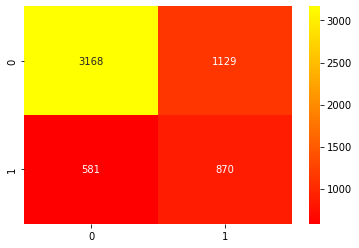

In [76]:
%%time

# train the hyper-tuned AdaBoostClassifier on SMOTE train set
adaboost = AdaBoostClassifier(learning_rate=0.2, n_estimators=100)
adaboost.fit(X_train_smote, y_train_smote)
y_pred = adaboost.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="", cmap='autumn') 
# print classification report
print(classification_report(y_test, y_pred))

In [77]:
# Gridsearch for GradientBoostClassifier

%%time

params = {'loss':['deviance', 'exponential'],\
'learning_rate':[0.05, 0.1]}
gradient = GradientBoostingClassifier()
grid = GridSearchCV(estimator = gradient, param_grid = params)
grid.fit(X_res, y_res)
print("Grid Best Score: ", grid.best_score_)
print("Grid Best Parameters: ", grid.best_params_)

UsageError: Line magic function `%%time` not found.


              precision    recall  f1-score   support

         0.0       0.85      0.77      0.80      4297
         1.0       0.46      0.59      0.52      1451

    accuracy                           0.72      5748
   macro avg       0.65      0.68      0.66      5748
weighted avg       0.75      0.72      0.73      5748

Wall time: 4.73 s


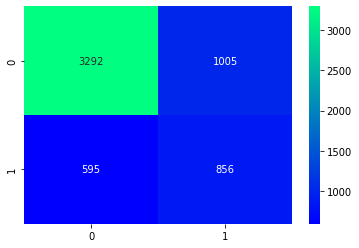

In [78]:
%%time

# train the hyper-tuned GradientBoostClassifier on SMOTE train set
gradient = GradientBoostingClassifier(learning_rate=0.1, loss='deviance')
gradient.fit(X_train_smote, y_train_smote)
y_pred = gradient.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="", cmap='winter') 
# print classification report
print(classification_report(y_test, y_pred))

In [79]:
# Gridsearch for ExtraGradientBoostClassifier

%%time

params = {'n_estimators':[100, 200, 300],\
'subsample':[0.5, 1.0], 'colsample_bytree': [0.5, 1.0], 'max_depth':[10, 14, 18]}
xgboost = XGBClassifier()
grid = GridSearchCV(estimator = xgboost, param_grid = params)
grid.fit(X_res, y_res)
print("Grid Best Score: ", grid.best_score_)
print("Grid Best Parameters: ", grid.best_params_)

UsageError: Line magic function `%%time` not found.


[21:57:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

         0.0       0.81      0.84      0.82      4297
         1.0       0.45      0.40      0.42      1451

    accuracy                           0.73      5748
   macro avg       0.63      0.62      0.62      5748
weighted avg       0.72      0.73      0.72      5748

Wall time: 8.64 s


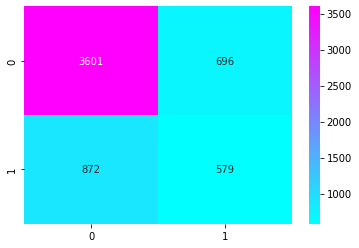

In [80]:
%%time
# train the hyper-tuned ExtraGradientBoostClassifier on SMOTE train set
xgboost = XGBClassifier(
 n_estimators=300, subsample=1.0, colsample_bytree=1.0,
 max_depth=10)
xgboost.fit(X_train_smote, y_train_smote)
y_pred = xgboost.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="", cmap='cool') 
# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.77      0.80      4297
         1.0       0.44      0.55      0.49      1451

    accuracy                           0.71      5748
   macro avg       0.64      0.66      0.64      5748
weighted avg       0.73      0.71      0.72      5748



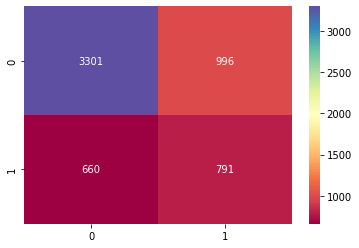

In [81]:
# train the MLPClassifier on SMOTE train set without GridSearch.

mlp = MLPClassifier(random_state=1, max_iter=1000, hidden_layer_sizes=50, activation='relu', solver='adam')
mlp.fit(X_train_smote, y_train_smote)
y_pred = mlp.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="", cmap='Spectral') 
# print classification report
print(classification_report(y_test, y_pred))

In [82]:
# run SMOTE on unsplit X and y to prepare for Stacking modelling and fitting

sm2 = SMOTE(random_state = 2)
X_res, y_res = sm2.fit_resample(X,y)
y_res

0        1.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
28757    1.0
28758    1.0
28759    1.0
28760    1.0
28761    1.0
Name: target, Length: 28762, dtype: float64

### Compute accuracy score for all models

In [83]:
# def accuracy_score(model):
#     score = cross_val_score(model, X_sc,y, cv=5, scoring='accuracy')
#     avg = np.mean(score)
#     return avg

In [84]:
# Define function for accuracy, specificity, and sensitivity score

def normal(X_res):
    sc = StandardScaler()
    _ = sc.fit_transform(X_res)
    _ = pd.DataFrame(data=_, columns=X.columns)
    return _

def confusion(y_test, y_pred):
    cm =confusion_matrix(y_test, np.rint(y_pred))
    tp = cm[1,1]
    tn = cm[0,0]
    fp = cm[0,1]
    fn = cm[1,0]
    accuracy = round((tp+tn) / (float(tp+tn+fp+fn)),2)
    specificity = tn / (tn+fp)
    sensitivity = tp / (tp+fn)
    return accuracy, specificity, sensitivity

def get_score (model2, X_res, y_res):
    acc = []
    spec = []
    sens = []
    t=5
    kf = KFold(n_splits=t, random_state=4, shuffle=True)
    _ = normal(X_res) # standardize data and output to dataframe
    for train, test in kf.split(X_sc): # rotating indexes
        X_train, X_test = _.iloc[train,:], _.iloc[test,:]
        y_train, y_test = y_res.iloc[train], y_res.iloc[test]
        model2.fit(X_train,y_train)
        y_pred = model2.predict(X_test)
        accuracy, specificity, sensitivity = confusion(y_test, y_pred)
        acc.append(accuracy) # accuracy score
        spec.append(specificity) # specificity
        sens.append(sensitivity) # sensitivity
    accuracy = np.mean(acc).round(decimals=2)
    specificity = np.mean(spec).round(decimals=2) 
    sensitivity = np.mean(sens).round(decimals=2)
    return accuracy, specificity, sensitivity


def total_score(models,model_names):
    acc = []
    for i, n in zip(models, model_names):
        accuracy, specificity, sensitivity = get_score(i,X,y) # call function
        cast = {'model':n,'accuracy': accuracy, 'specificity': specificity, 'sensitivity':sensitivity}
        acc.append(cast)
    summary = pd.DataFrame(data=acc, columns=['model','accuracy','specificity', 'sensitivity'])
    return summary

def stack_score(estimators, X, y):
    accuracy, specificity, sensitivity = get_score (estimators, X, y)
    # create dataframe for scalar data structure
    stack_df = pd.DataFrame({'model': 'StackingClassifier', 'accuracy': accuracy, 'specificity': specificity, \
                         'sensitivity': sensitivity}, index=[0])
    return stack_df




In [85]:
# List the models 

knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
tree = DecisionTreeClassifier(criterion='entropy', max_depth=20, splitter='best')
adaboost = AdaBoostClassifier(learning_rate=0.2, n_estimators=100)
gradient = GradientBoostingClassifier(learning_rate=0.1, loss='deviance')
#svc = SVC(kernel='linear', C=10, probability=True)
rfc = RandomForestClassifier(max_depth=20, n_estimators=200)
xgboost = XGBClassifier(n_estimators=300, subsample=1.0, colsample_bytree=1.0, max_depth=10)
mlp = MLPClassifier(random_state=1, max_iter=1000, hidden_layer_sizes=50, activation='relu', solver='adam')

In [86]:
# define the classification models for stacking and scores

models = [gradient, adaboost, tree, knn, rfc, xgboost, mlp]
all_scores = ['GradientBoostClassifier','AdaBoostClassifier','DecisionTreeClassifier','KNeighborsClassifier',\
              'RandomForestClassifier', 'XGBClassifier', 'MLPClassifier']

total_score_df = total_score(models, all_scores)
total_score_df

[21:59:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:59:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:59:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:59:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,model,accuracy,specificity,sensitivity
0,GradientBoostClassifier,0.78,0.90,0.41
1,AdaBoostClassifier,0.78,0.92,0.35
2,DecisionTreeClassifier,0.71,0.82,0.38
3,KNeighborsClassifier,0.74,0.87,0.35
4,RandomForestClassifier,0.77,0.91,0.36
5,XGBClassifier,0.74,0.87,0.36
6,MLPClassifier,0.77,0.92,0.34


In [87]:
%%time

# Fit into StackingClassifier model

classifiers = [('rfc', rfc),('mlp', mlp),('knn', knn),('tree', tree),('adaboost', adaboost),('gradient', gradient),\
              ('xgboost', xgboost)]
stack = StackingClassifier(estimators = classifiers, final_estimator=LogisticRegression())

stacking = stack_score(stack, X_res, y_res)

[22:09:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:10:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:10:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:10:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:19:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:19:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:19:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 10min 28s


In [88]:
# Order the models according to accuracy 

all_model_score = pd.concat([total_score_df, stacking])
all_model_score.sort_values('accuracy', ascending=False)

,model,accuracy,specificity,sensitivity
0,GradientBoostClassifier,0.78,0.90,0.41
1,AdaBoostClassifier,0.78,0.92,0.35
0,StackingClassifier,0.78,0.91,0.40
4,RandomForestClassifier,0.77,0.91,0.36
6,MLPClassifier,0.77,0.92,0.34
3,KNeighborsClassifier,0.74,0.87,0.35
5,XGBClassifier,0.74,0.87,0.36
2,DecisionTreeClassifier,0.71,0.82,0.38


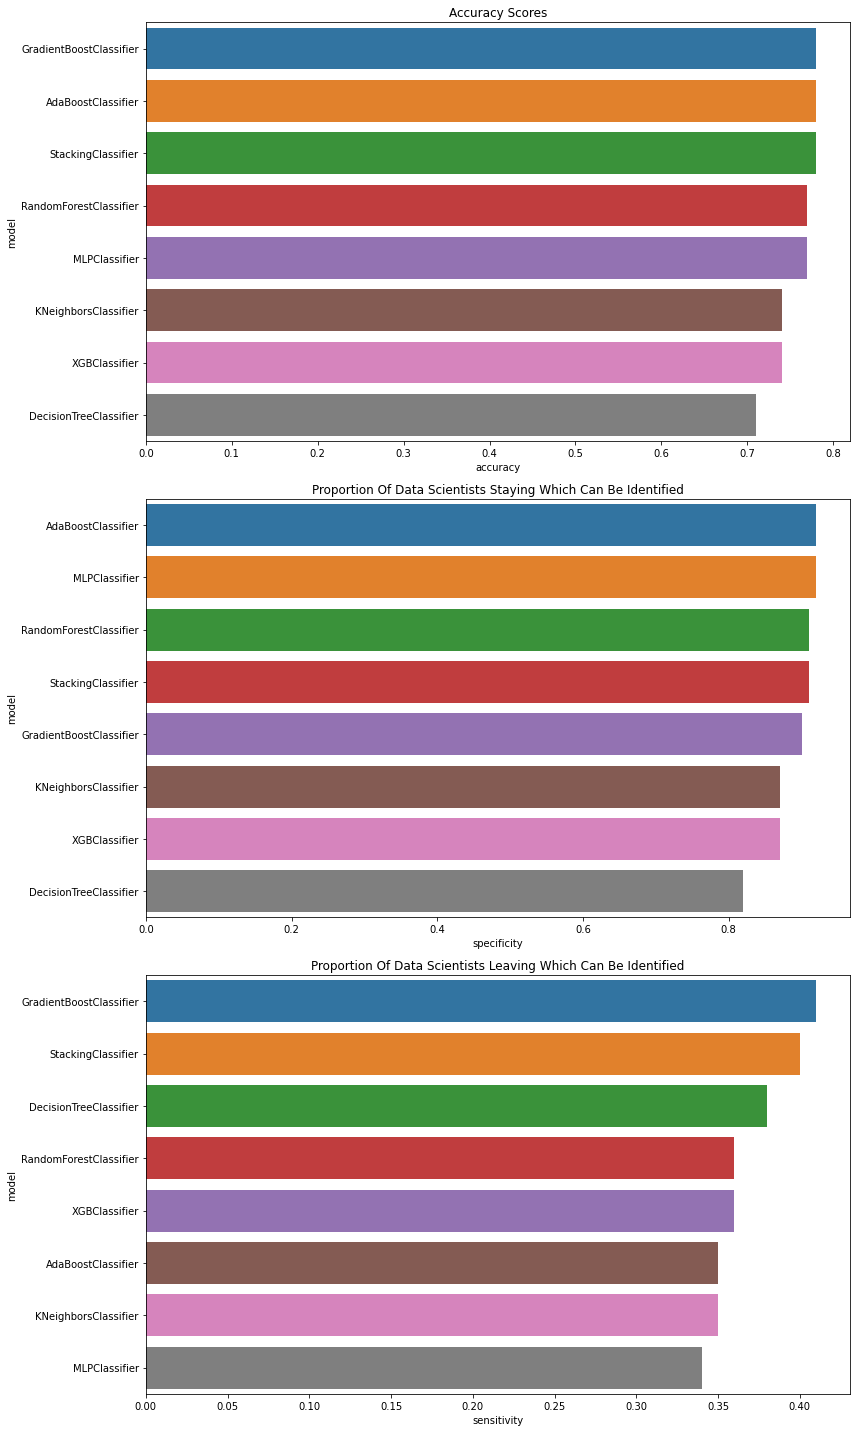

In [89]:
# Plot bar graphs for accuracy score, specificity, and sensitivity

scores = ['accuracy', 'specificity','sensitivity']
titles = ['Accuracy Scores', 'Proportion Of Data Scientists Staying Which Can Be Identified',\
          'Proportion Of Data Scientists Leaving Which Can Be Identified']

order1 = all_model_score.sort_values('accuracy', ascending=False).model
order2 = all_model_score.sort_values('specificity', ascending=False).model
order3 = all_model_score.sort_values('sensitivity', ascending=False).model
orders = [order1, order2, order3]

plt.figure(figsize=(12,20))
    
h=1
for score, title, order in zip(scores, titles, orders):
    plt.subplot(3,1,h)
    sns.barplot(data=all_model_score, x=score, y='model', order=order)
    plt.title(title)
    h+=1

plt.tight_layout()
plt.show()

### ROC AUC Scores

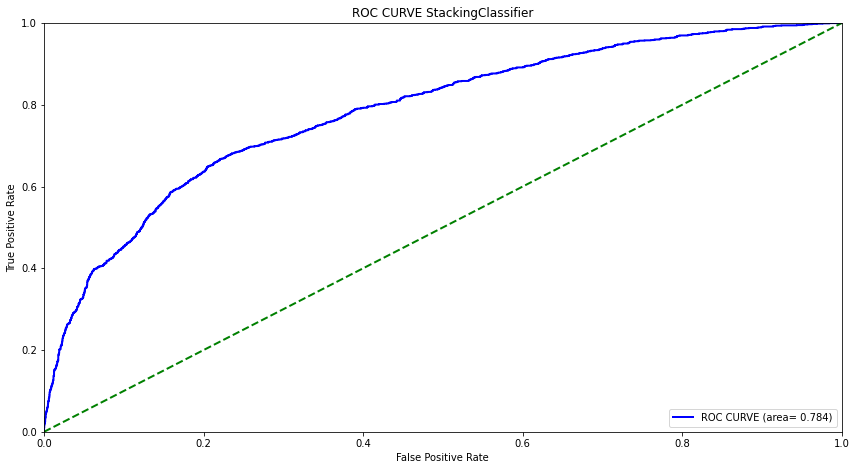

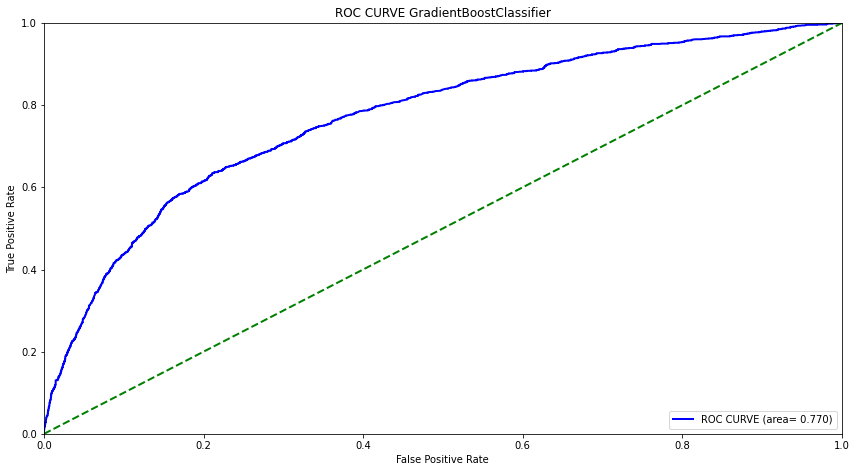

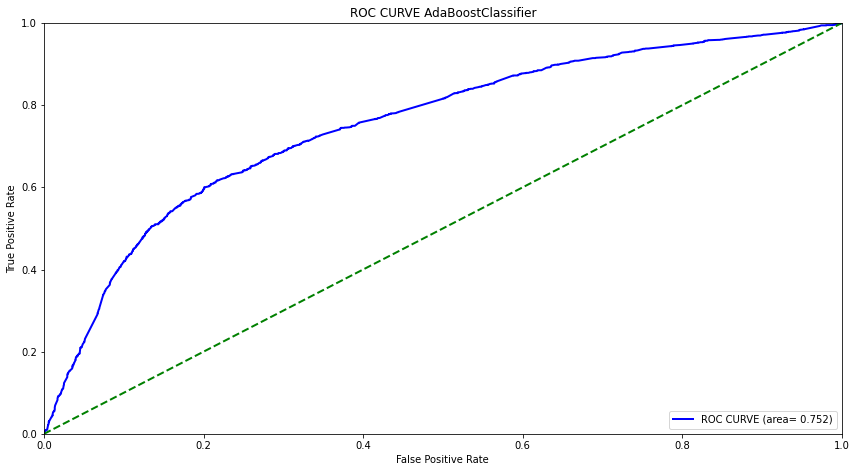

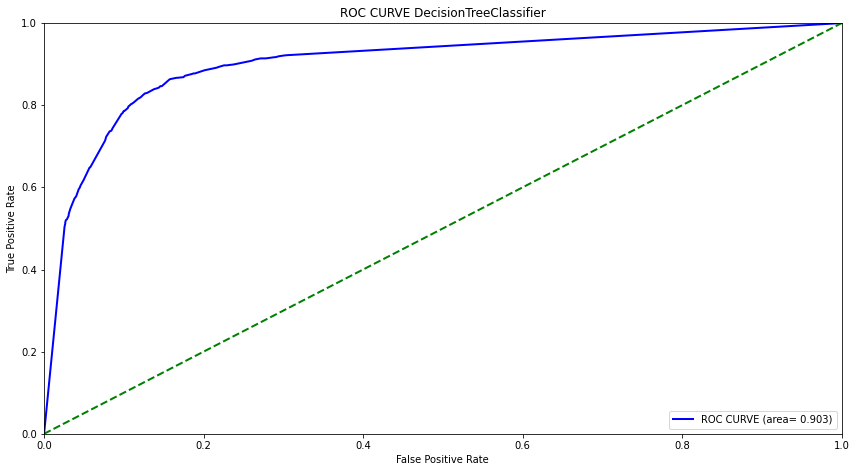

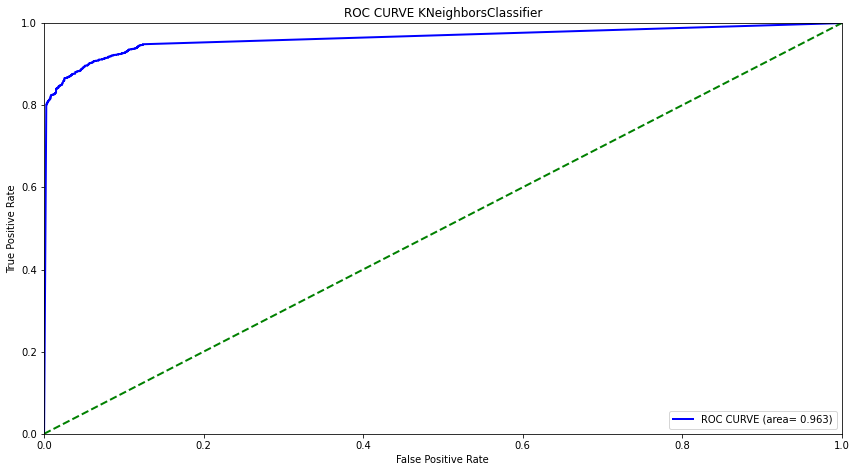

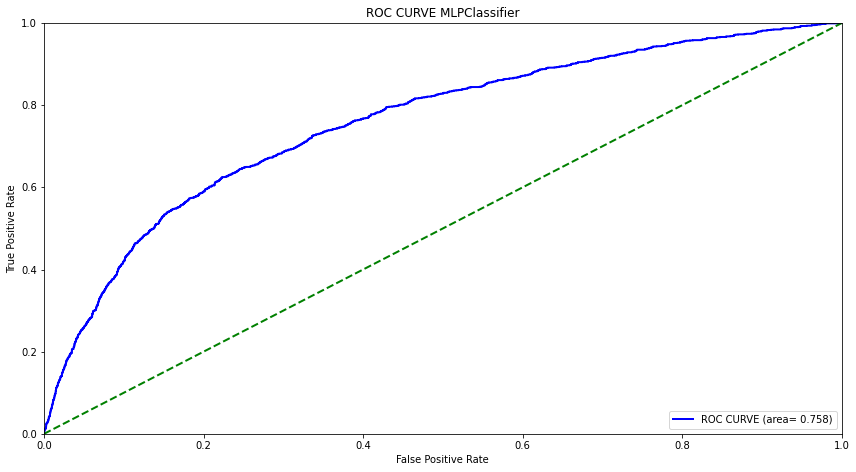

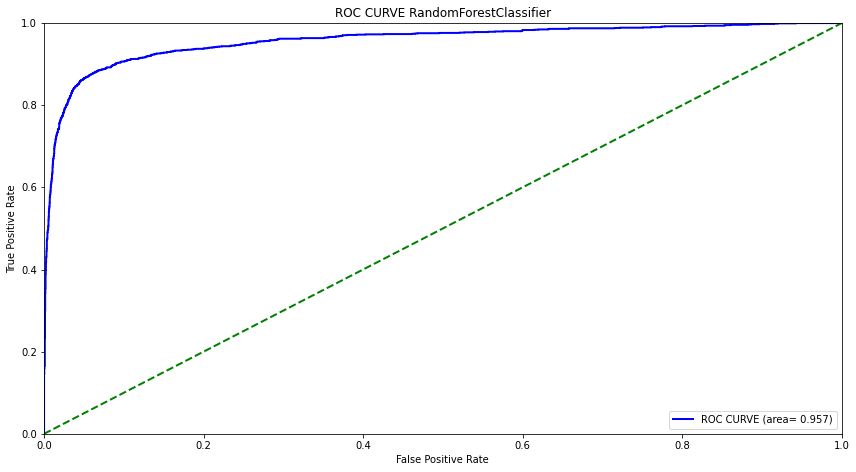

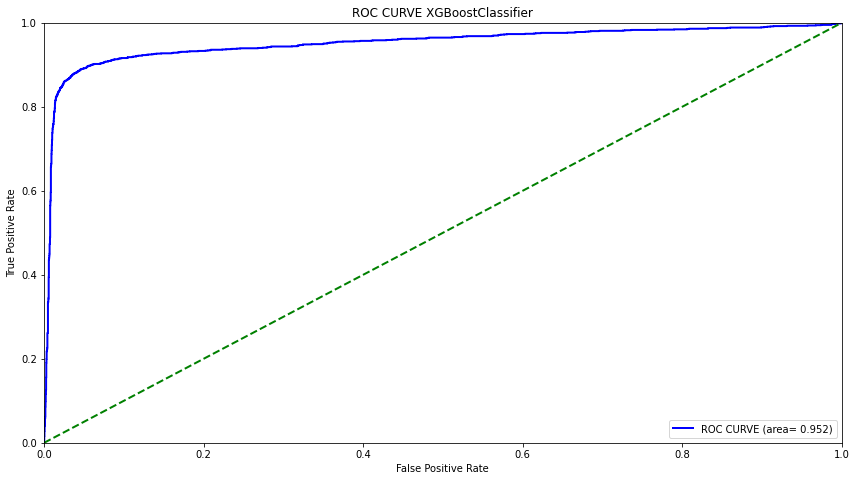

,Models,ROC AUC SCORE
4,KNeighborsClassifier,0.963129
6,RandomForestClassifier,0.957160
7,XGBoostClassifier,0.951514
3,DecisionTreeClassifier,0.903151
0,StackingClassifier,0.783988
1,GradientBoostClassifier,0.770357
5,MLPClassifier,0.757838
2,AdaBoostClassifier,0.752410


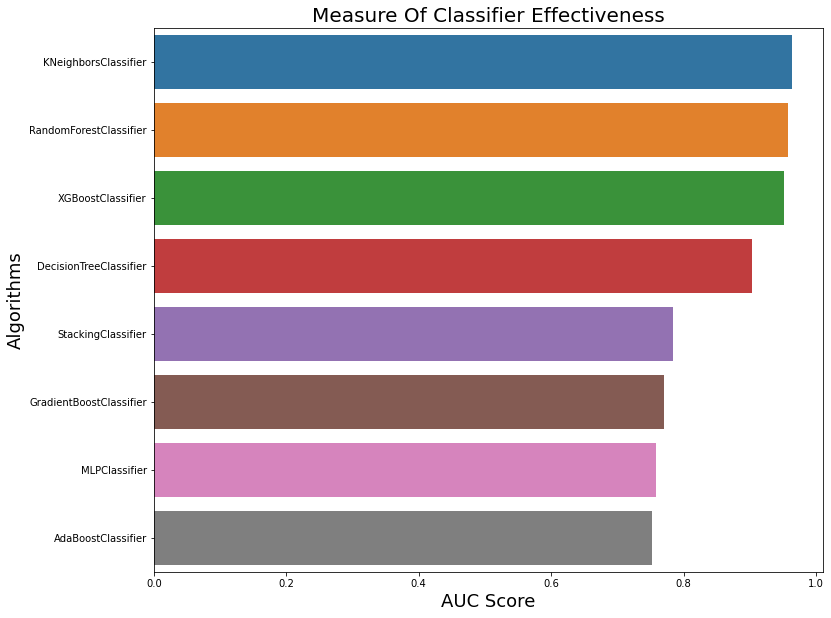

In [90]:
# Define the function and plot the roc auc curves for each model.

models = [stack, gradient, adaboost, tree, knn, mlp, rfc, xgboost]
all_scores = ['StackingClassifier','GradientBoostClassifier','AdaBoostClassifier','DecisionTreeClassifier',\
              'KNeighborsClassifier','MLPClassifier','RandomForestClassifier', 'XGBoostClassifier']
total=[]
h=1
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, random_state=1, test_size=0.3)
for m, s in zip(models, all_scores):
    y_pred = m.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred)
    roc = {'Models': s, 'ROC AUC SCORE': auc }
    total.append(roc)
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.figure(figsize= (12,50))
    plt.subplot(8,1,h)
    lw=2
    plt.plot(fpr, tpr, color='blue', lw=lw, label = 'ROC CURVE (area= %0.3f)' %roc_auc)
    plt.plot([0,1],[0,1], color='green', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"ROC CURVE {s}")
    plt.legend(loc = 'lower right')
    plt.tight_layout()
    plt.show()
    h+=1
    
classifier = pd.DataFrame(data=total, columns=['Models','ROC AUC SCORE'])
order= classifier.sort_values('ROC AUC SCORE', ascending=False).Models
classifier = classifier.sort_values('ROC AUC SCORE', ascending=False)
    
# plot 'classifier' barplot
plt.figure(figsize= (12,10))
sns.barplot(data=classifier, x='ROC AUC SCORE', y='Models', order=order)
plt.title('Measure Of Classifier Effectiveness', fontsize=20)
plt.xlabel('AUC Score', fontsize= 18)
plt.ylabel('Algorithms', fontsize= 18)
classifier

In [91]:
# Write the function to produce the scores for the threshold for the top 3 classification models

def base_on_score_threshold (model1,threshold):
    _=normal(X_res)
    X_train, X_test, y_train, y_test = train_test_split(_,y_res, test_size=0.3, random_state=2)    
    
    # output probabilities
    probability = model1.predict_proba(X_test)[:,1]
        
    # setting threshold
    y_pred = probability > threshold
    
    acc, spec, sens = confusion(y_test, y_pred)
    accuracy = np.mean(acc).round(decimals=2)
    specificity = np.mean(spec).round(decimals=2) 
    sensitivity = np.mean(sens).round(decimals=2)

    return accuracy, specificity, sensitivity

In [92]:
# threshold for random forest classifier

threshold=0.2
model1=gradient
accuracy, specificity, sensitivity = base_on_score_threshold (model1,threshold)
print(f"GradientBoost accuracy is {accuracy}")
print(f"GradientBoost: able to capture {specificity} of those who do not intend to quit")
print(f"GradientBoost: able to capture {sensitivity} of those who intend to quit")

GradientBoost accuracy is 0.7
GradientBoost: able to capture 0.78 of those who do not intend to quit
GradientBoost: able to capture 0.61 of those who intend to quit


In [93]:
# threshold for random forest classifier

threshold=0.2
model1=rfc
accuracy, specificity, sensitivity = base_on_score_threshold (model1,threshold)
print(f"RandomForestClassifier accuracy is {accuracy}")
print(f"RandomForestClassifier: able to capture {specificity} of those who do not intend to quit")
print(f"RandomForestClassifier: able to capture {sensitivity} of those who intend to quit")

RandomForestClassifier accuracy is 0.74
RandomForestClassifier: able to capture 0.78 of those who do not intend to quit
RandomForestClassifier: able to capture 0.71 of those who intend to quit


In [94]:
# threshold for XGBoost Classifier

threshold=0.2
model1=xgboost
accuracy, specificity, sensitivity = base_on_score_threshold (model1,threshold)
print(f"XGBoost accuracy is {accuracy}")
print(f"XGBoost: able to capture {specificity} of those who do not intend to quit")
print(f"XGBoost: able to capture {sensitivity} of those who intend to quit")

XGBoost accuracy is 0.66
XGBoost: able to capture 0.9 of those who do not intend to quit
XGBoost: able to capture 0.42 of those who intend to quit


In [95]:
# threshold for KNeighbors Classifier

threshold=0.2
model1=knn
accuracy, specificity, sensitivity = base_on_score_threshold (model1,threshold)
print(f"KNeighborsClassifier accuracy is {accuracy}")
print(f"KNeighborsClassifier: able to capture {specificity} of those who do not intend to quit")
print(f"KNeighborsClassifier: able to capture {sensitivity} of those who intend to quit")

KNeighborsClassifier accuracy is 0.76
KNeighborsClassifier: able to capture 0.71 of those who do not intend to quit
KNeighborsClassifier: able to capture 0.81 of those who intend to quit


In [96]:
# Write the function to run a range of thresholds for the top 3 classifiers

threshold = np.arange(0.2, 0.9, 0.05)

t, t_1 = list(), list()
top_models = [rfc, xgboost, knn]
model_names = ['RandomForestClassifier', 'XGBClassifier','KNeighborsClassifier']

for tm, mn in zip(top_models, model_names):
    for k in threshold:
        accuracy, specificity, sensitivity = base_on_score_threshold (tm, k)
        nq = {'threshold': k, 'models': mn, 'scores': specificity, 'result': 'not quitting'}
        t.append(nq)
        q = {'threshold': k, 'models': mn, 'scores': sensitivity, 'result': 'quitting'}
        t_1.append(q)
    
datascientist_quitting = pd.DataFrame(data=t_1, columns=['threshold','models','scores', 'result'])
datascientist_not_quitting = pd.DataFrame(data=t, columns=['threshold','models','scores', 'result'])

In [97]:
datascientist_quitting.models.unique()

array(['RandomForestClassifier', 'XGBClassifier', 'KNeighborsClassifier'],
      dtype=object)

In [98]:
datascientist_quitting.models = datascientist_quitting.models.map({'RandomForestClassifier':'quit_RandomForest',
                                                                  'XGBClassifier':'quit_XGBClassifier',
                                                                  'KNeighborsClassifier':'quit_KNeighbors'})

In [99]:
datascientist_not_quitting.models = datascientist_not_quitting.models.map({'RandomForestClassifier':'not_quit_RandomForest',
                                                                  'XGBClassifier':'not_quit_XGBClassifier',
                                                                  'KNeighborsClassifier':'not_quit_KNeighbors'})

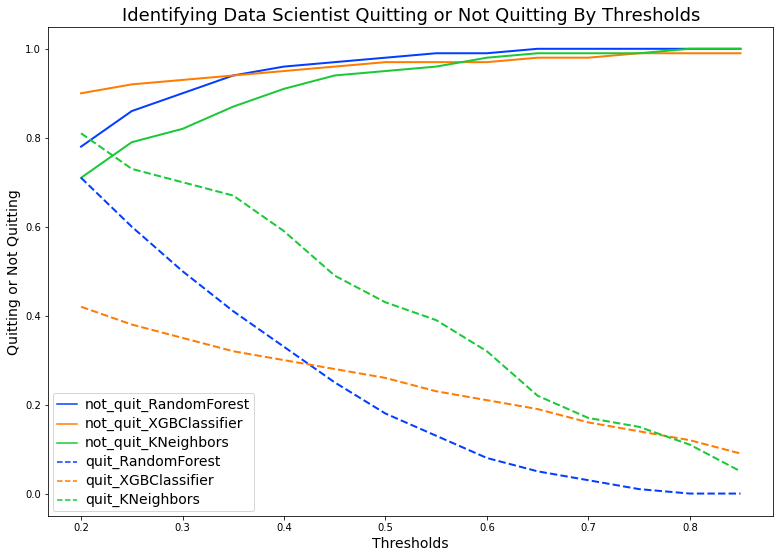

In [100]:
# Plot line graphs for Random Forest, XGBoost and KNeighbors Classifiers based on thresholds

plt.figure(figsize=(13,9))
ax = sns.lineplot(data=datascientist_not_quitting, x='threshold', y='scores', hue='models', linewidth=2, ci=None, palette='bright')
ax = sns.lineplot(data=datascientist_quitting, x='threshold', y='scores', hue='models', linestyle='--', linewidth=2,\
                 ci=None, palette='bright')
plt.title('Identifying Data Scientist Quitting or Not Quitting By Thresholds', fontsize= 18)
plt.xlabel('Thresholds', fontsize= 14)
plt.ylabel('Quitting or Not Quitting', fontsize= 14)


style = ax.legend()
style_lines = style.get_lines()
for i in range(3,6):
    style_lines[i].set_linestyle("--")

plt.setp(ax.get_legend().get_texts(), fontsize=14);

In [101]:
# define the function to determine who will quit

def predict_quit(X, sample, model3, threshold):
    _=normal(X)
    probability = model3.predict_proba(X)[:,1]
    predicted = probability >= threshold
    #sample['predict'] = predicted
    sample['predict'] = [0 if i == False else 1 for i in predicted]
    quit_id = sample.loc[sample['predict']==1, 'enrollee_id']
    print(f"There are {len(quit_id)} data scientists who intend to quit")
    print()
    print('The following are the list of data scientists predicted to quit:')
    print(quit_id)

In [102]:
# Define X and y

X = hr_dataset.drop(['enrollee_id','city','training_hrs_cat','target'], axis=1)
y = hr_dataset['target']

In [164]:
# arguments for the function

threshold = 0.2
sample = hr_dataset
X=X
model3=knn

# calling the function to predict who will quit
predict_quit(X, sample, model3, threshold)

There are 1837 data scientists who intend to quit

The following are the list of data scientists predicted to quit:
35        4866
50        5568
64        9572
86       30937
87       28751
         ...  
19118    12211
19122    27018
19135    20520
19156     5756
19157    23834
Name: enrollee_id, Length: 1837, dtype: int64


## The End